## ML_SP22_RE_4 
### Due Date: 03/25 before Mid-night
### Linear Regression, One-hot encoding and K-fold cross validation

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This review exercise is on building a Linear Regression model, practice k-fold cross validation and one-hot encoding 

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [145]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [146]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

***Type your code here***

In [148]:
housing.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<AxesSubplot:xlabel='HouseAge', ylabel='Price'>

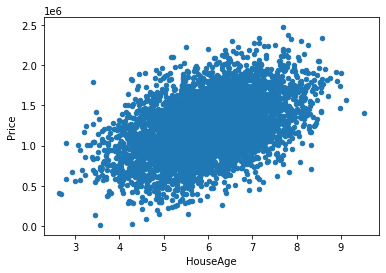

In [149]:
housing.plot(kind='scatter',x="HouseAge", y="Price")

<AxesSubplot:xlabel='Income', ylabel='Price'>

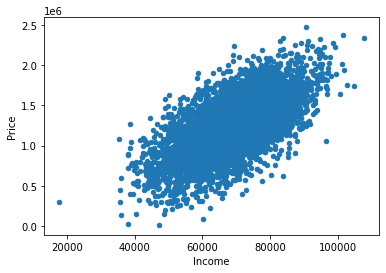

In [150]:
housing.plot(kind='scatter',x="Income",y="Price")

<AxesSubplot:xlabel='AreaNumberOfBedrooms', ylabel='Price'>

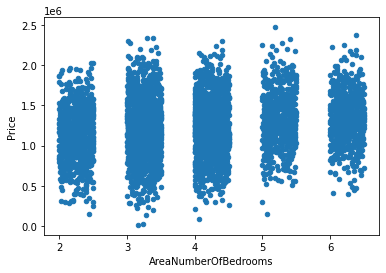

In [151]:
housing.plot(kind='scatter', x="AreaNumberOfBedrooms",y="Price")

<AxesSubplot:xlabel='NumberOfRooms', ylabel='Price'>

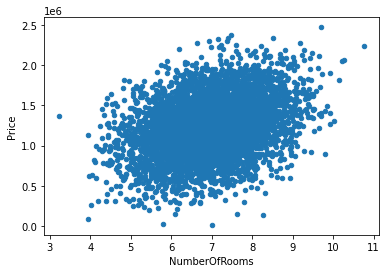

In [152]:
housing.plot(kind='scatter',x="NumberOfRooms", y="Price")

<AxesSubplot:xlabel='Population', ylabel='Price'>

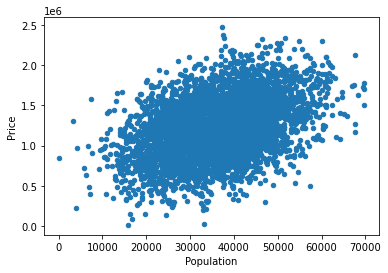

In [153]:
housing.plot(kind='scatter',x="Population", y="Price")

***Pick an additional variable to build a two-factors linear regression model***


In [154]:
# type your code here
# perform a 10-fold cross validation

In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [156]:
Xarray = housing['Income'].values
Yarray = housing['Price'].values

In [157]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [158]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [159]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * housing.shape[0])
print(0.2 * housing.shape[0])

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)
4000.0
1000.0


In [160]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_)
print(model.coef_)

[-224617.80110797]
[[21.24368249]]


In [161]:
Y_pred = model.predict(X_test)

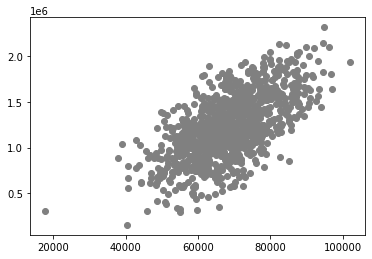

In [162]:
plt.scatter(X_test, Y_test, color='gray')
plt.show()

3

In [163]:
from sklearn import metrics

In [164]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred)) 
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 74084394120.77266
R-squared: 0.4006059806785851


4

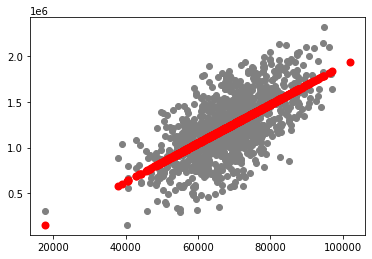

In [165]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

5

In [166]:
import random
for i in range(10):
    print(random.randint(1, 1000))

149
506
454
337
958
426
763
324
559
514


In [167]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.446827
1,1,0.439439
2,2,0.414052
3,3,0.392975
4,4,0.398922
5,5,0.395468
6,6,0.374590
7,7,0.397610
8,8,0.393649
9,9,0.420831


<AxesSubplot:xlabel='trial'>

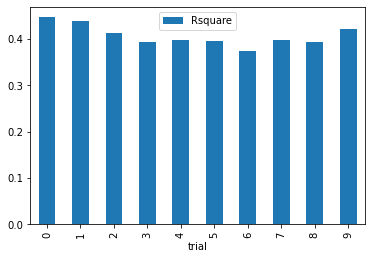

In [168]:
rdf.plot.bar(x='trial', y='Rsquare')

In [169]:
print(rdf['Rsquare'].mean())

0.4074363257598731


6

In [170]:
X = housing[['Income','HouseAge']].values.reshape(-1, 2)
Y = housing['Price'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4000, 2) (1000, 2)
(4000, 1) (1000, 1)


In [171]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
Y_pred = model2.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[21.02898877]]
[-213708.26862509]


In [172]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.6111416177920193


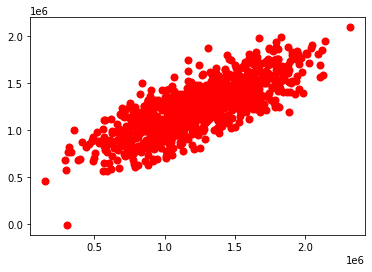

In [173]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [174]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model1 = LinearRegression()
    model1.fit(X_train, Y_train)
    Y_pred = model1.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf


,trial,Rsquare
0,0,0.607022
1,1,0.600316
2,2,0.616134
3,3,0.606357
4,4,0.592650
5,5,0.610014
6,6,0.611740
7,7,0.611951
8,8,0.636554
9,9,0.643765


<AxesSubplot:xlabel='trial'>

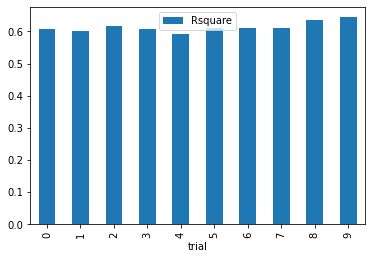

In [175]:
rdf.plot.bar(x='trial', y='Rsquare')

In [176]:
print(rdf['Rsquare'].mean())

0.6136504600977883


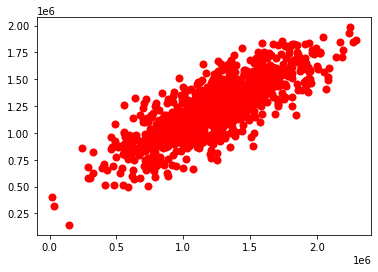

In [177]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

after add one is better

### Now load the Salary data set

In [178]:
# Load the dataset
df = pd.read_csv("Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [179]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [180]:
df.isnull().any() 
# or
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

In [181]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(399, 6)

<AxesSubplot:xlabel='Salary'>

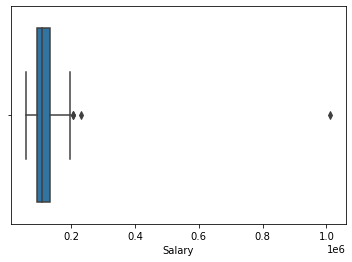

In [182]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

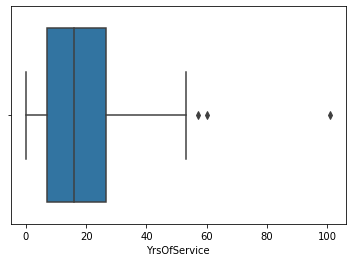

In [183]:
sns.boxplot(x=df['YrsOfService'])

In [184]:
# remove un-reasonable data, 
df = df[df['YrsOfService'] < 70]
df = df[df['Salary'] < 400000]
df.shape

(397, 6)

<AxesSubplot:xlabel='Salary'>

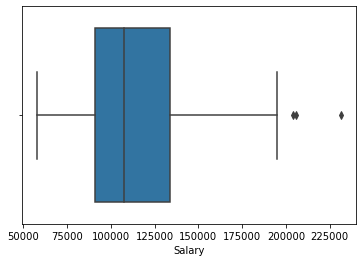

In [185]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

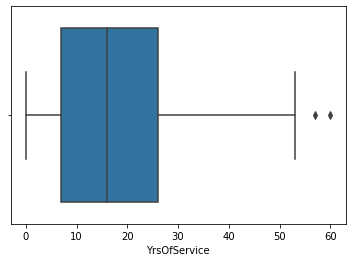

In [186]:
sns.boxplot(x=df['YrsOfService'])

In [187]:
df.shape

(397, 6)

In [188]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


***In general it is a good idea to reset the index after we remove rows***

In [189]:
df = df.reset_index()
df.tail()

,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,398,Prof,A,33.0,30.0,Male,103106
393,399,Prof,A,31.0,19.0,Male,150564
394,400,Prof,A,42.0,25.0,Male,101738
395,401,Prof,A,25.0,15.0,Male,95329
396,402,AsstProf,A,8.0,4.0,Male,81035


### Now we are ready to use this data to build model ###

1. Separate numerical features from categorical features
2. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
3. Check if the model pass cross validation
4. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable
to build a second model.
5. Comment on if the model improve or not

***Type your code here***

In [190]:
# ignore longitude and latitude
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']

numerical_df = df[numerical_features]

numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [191]:
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


In [192]:
categorical_features = ['Sex','Discipline','Rank']
categorical_df = df[categorical_features]
categorical_df.head()

,Sex,Discipline,Rank
0,Male,B,Prof
1,Male,B,Prof
2,Male,B,AsstProf
3,Male,B,Prof
4,Male,B,Prof


In [193]:
X = df[['YrsSincePhd', 'YrsOfService']].values.reshape(-1, 2)
Y = df['Salary'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(317, 2) (80, 2)
(317, 1) (80, 1)


In [194]:
df[['YrsSincePhd', 'YrsOfService']].head()

,YrsSincePhd,YrsOfService
0,19.0,18.0
1,20.0,16.0
2,4.0,3.0
3,45.0,39.0
4,40.0,41.0


In [195]:
model6 = LinearRegression()
model6.fit(X_train, Y_train)
Y_pred = model6.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[21.02898877]]
[-213708.26862509]


In [196]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.2114870194393913


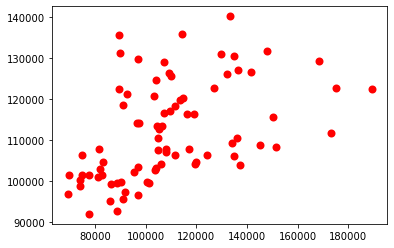

In [197]:
plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [198]:
import random
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model1 = LinearRegression()
    model1.fit(X_train, Y_train)
    Y_pred = model1.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.247649
1,1,0.142514
2,2,0.130182
3,3,0.186438
4,4,0.214042
5,5,0.128683
6,6,0.111022
7,7,0.055658
8,8,0.195097
9,9,0.121696


<AxesSubplot:xlabel='trial'>

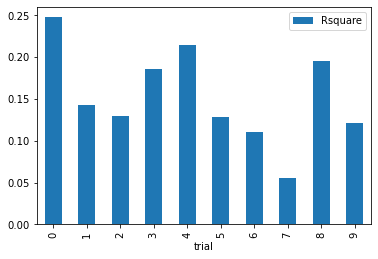

In [199]:
rdf.plot.bar(x='trial', y='Rsquare')

In [200]:
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']
categorical_features = ['Sex','Discipline','Rank']

In [201]:
numerical_df = df[numerical_features]

In [202]:
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


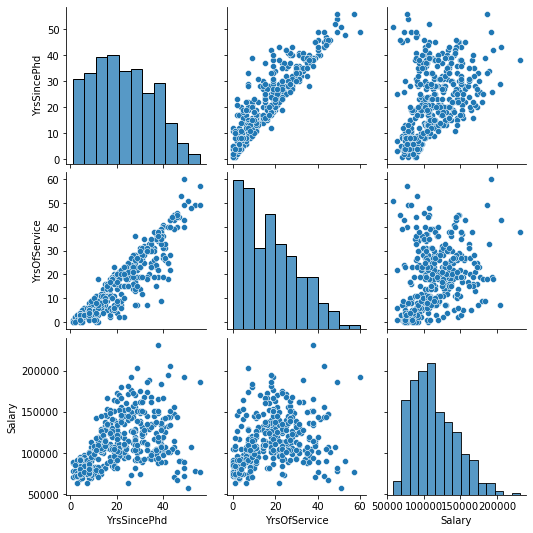

In [203]:
sns.pairplot(numerical_df)

<AxesSubplot:xlabel='YrsSincePhd', ylabel='YrsOfService'>

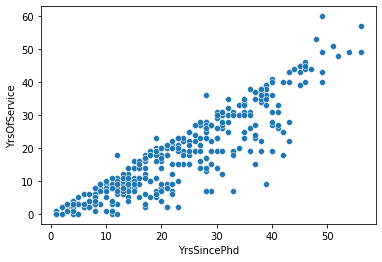

In [204]:
sns.scatterplot(x='YrsSincePhd', y='YrsOfService', data=numerical_df)

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics


X = numerical_df['YrsSincePhd'].values.reshape(-1, 1)
Y = numerical_df['YrsOfService'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

[-2.8625528]
[[0.91525031]]
R-squared: 0.8692892608349068


In [206]:
df['Sex'].unique()



array(['Male', 'Female'], dtype=object)

In [207]:
categorical_df = df[categorical_features]
categorical_df.head()

,Sex,Discipline,Rank
0,Male,B,Prof
1,Male,B,Prof
2,Male,B,AsstProf
3,Male,B,Prof
4,Male,B,Prof


In [208]:
categorical_df.tail()

,Sex,Discipline,Rank
392,Male,A,Prof
393,Male,A,Prof
394,Male,A,Prof
395,Male,A,Prof
396,Male,A,AsstProf


In [209]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(categorical_df)
housing_cat_1hot

<397x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1191 stored elements in Compressed Sparse Row format>

In [210]:
housing_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [211]:
cat_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['AssocProf', 'AsstProf', 'Prof'], dtype=object)]

In [212]:
occupation1 = pd.get_dummies(df['Sex'],drop_first=True)
occupation1

,Male
0,1
1,1
2,1
3,1
4,1
...,...
392,1
393,1
394,1
395,1


In [213]:
train1 = df[['YrsSincePhd', 'YrsOfService', 'Salary']]
train1.head()

,YrsSincePhd,YrsOfService,Salary
0,19.0,18.0,139750
1,20.0,16.0,173200
2,4.0,3.0,79750
3,45.0,39.0,115000
4,40.0,41.0,141500


In [214]:
train2 = pd.concat([train1, occupation1], axis=1)
train2.head()

,YrsSincePhd,YrsOfService,Salary,Male
0,19.0,18.0,139750,1
1,20.0,16.0,173200,1
2,4.0,3.0,79750,1
3,45.0,39.0,115000,1
4,40.0,41.0,141500,1


In [215]:
X = numerical_df[['YrsSincePhd', 'Salary']].values.reshape(-1, 2)
Y = numerical_df['YrsOfService'].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

[-0.49122546]
[[ 9.39816836e-01 -2.55343280e-05]]
R-squared: 0.8702932219912448


In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(train2.drop('YrsOfService',axis=1), 
                                                    train2['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [217]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-1.352241584408116
[ 9.57338589e-01 -2.99645519e-05  9.89087491e-01]
R-squared: 0.8105500356548758


In [218]:
df['Discipline'].unique()

array(['B', 'A'], dtype=object)

In [219]:
categorical_df = df['Discipline']
categorical_df.head()

0    B
1    B
2    B
3    B
4    B
Name: Discipline, dtype: object

In [220]:
categorical_df.tail()

392    A
393    A
394    A
395    A
396    A
Name: Discipline, dtype: object

In [221]:
occupation2 = pd.get_dummies(df['Discipline'],drop_first=True)
occupation2

,B
0,1
1,1
2,1
3,1
4,1
...,...
392,0
393,0
394,0
395,0


In [222]:
train3 = pd.concat([train1, occupation2], axis=1)
train3.head()

,YrsSincePhd,YrsOfService,Salary,B
0,19.0,18.0,139750,1
1,20.0,16.0,173200,1
2,4.0,3.0,79750,1
3,45.0,39.0,115000,1
4,40.0,41.0,141500,1


In [223]:
X_train, X_test, Y_train, Y_test = train_test_split(train3.drop('YrsOfService',axis=1), 
                                                    train3['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [224]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-0.9849559956289191
[ 9.74254634e-01 -3.43478223e-05  1.17073560e+00]
R-squared: 0.8146626719970196


In [225]:
df['Rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [226]:
occupation3 = pd.get_dummies(df['Rank'],drop_first=True)
occupation3

,AsstProf,Prof
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
392,0,1
393,0,1
394,0,1
395,0,1


In [227]:
train4 = pd.concat([train1, occupation3], axis=1)
train4.head()

,YrsSincePhd,YrsOfService,Salary,AsstProf,Prof
0,19.0,18.0,139750,0,1
1,20.0,16.0,173200,0,1
2,4.0,3.0,79750,1,0
3,45.0,39.0,115000,0,1
4,40.0,41.0,141500,0,1


In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(train3.drop('YrsOfService',axis=1), 
                                                    train3['YrsOfService'], 
                                                    test_size=0.30, 
                                                    random_state=101)

In [229]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

-0.9849559956289191
[ 9.74254634e-01 -3.43478223e-05  1.17073560e+00]
R-squared: 0.8146626719970196
